In [1]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import networkx as nx
   
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn
import pandas as pd

from math import sqrt
from sklearn.metrics import mean_squared_error

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb

from tigramite.models import LinearMediation, Prediction

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

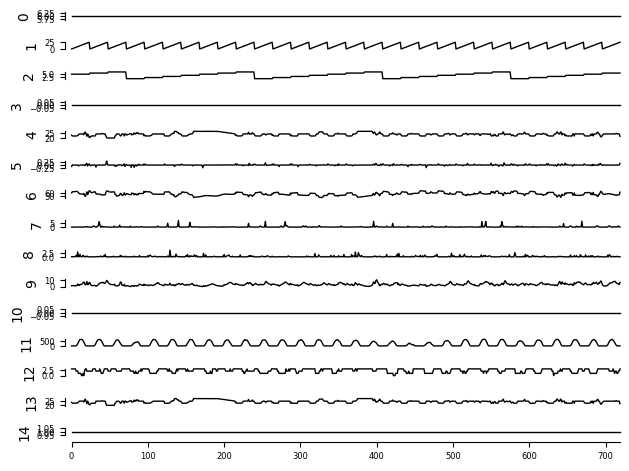

In [2]:
#reading Building1.csv

electricity_data = pd.read_csv("citylearn_challenge_2023_phase_1/Building_1.csv")
print(electricity_data)
building_frame = pp.DataFrame(data=electricity_data.values)
tp.plot_timeseries(building_frame); plt.show()

     carbon_intensity
0            0.402488
1            0.382625
2            0.369458
3            0.367017
4            0.374040
..                ...
715          0.465811
716          0.470324
717          0.462414
718          0.448648
719          0.428057

[720 rows x 1 columns]


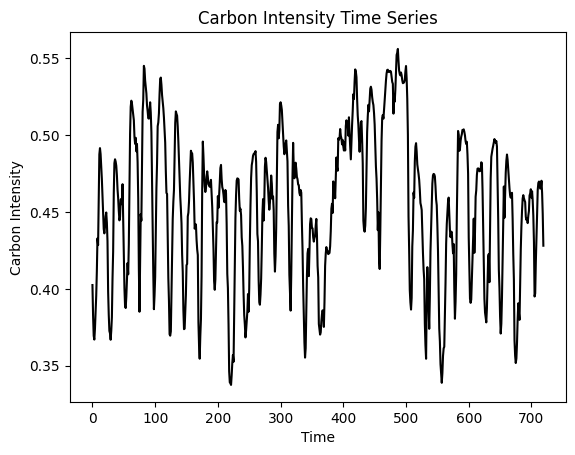

In [3]:
carbon_data = pd.read_csv("citylearn_challenge_2023_phase_1/carbon_intensity.csv")
print(carbon_data)

plt.plot(carbon_data.index, carbon_data['carbon_intensity'], color = 'k')
plt.xlabel('Time')
plt.ylabel('Carbon Intensity')
plt.title('Carbon Intensity Time Series')
plt.show()

     electricity_pricing  electricity_pricing_predicted_6h  \
0                0.02893                           0.02893   
1                0.02893                           0.02915   
2                0.02893                           0.02915   
3                0.02893                           0.02915   
4                0.02893                           0.02915   
..                   ...                               ...   
715              0.02893                           0.02893   
716              0.02893                           0.02893   
717              0.02893                           0.02893   
718              0.02893                           0.02893   
719              0.02893                           0.02893   

     electricity_pricing_predicted_12h  electricity_pricing_predicted_24h  
0                              0.02915                            0.02893  
1                              0.02915                            0.02893  
2                          

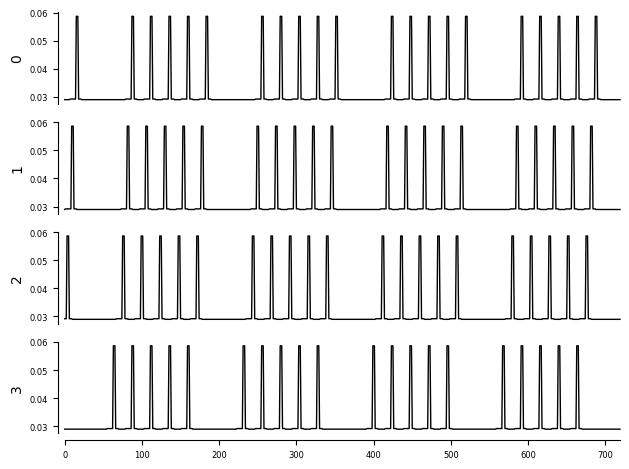

In [4]:
pricing_data = pd.read_csv("citylearn_challenge_2023_phase_1/pricing.csv")
print(pricing_data)

pricing_frame = pp.DataFrame(data=pricing_data.values)
tp.plot_timeseries(pricing_frame); plt.show()

     outdoor_dry_bulb_temperature  outdoor_relative_humidity  \
0                           24.66                      77.56   
1                           24.07                      85.12   
2                           23.90                      89.62   
3                           23.87                      91.88   
4                           23.83                      93.06   
..                            ...                        ...   
715                         31.98                      43.75   
716                         29.92                      51.62   
717                         28.48                      59.12   
718                         27.27                      66.56   
719                         26.26                      73.75   

     diffuse_solar_irradiance  direct_solar_irradiance  \
0                        0.00                     0.00   
1                        0.00                     0.00   
2                        0.00                     0.00   

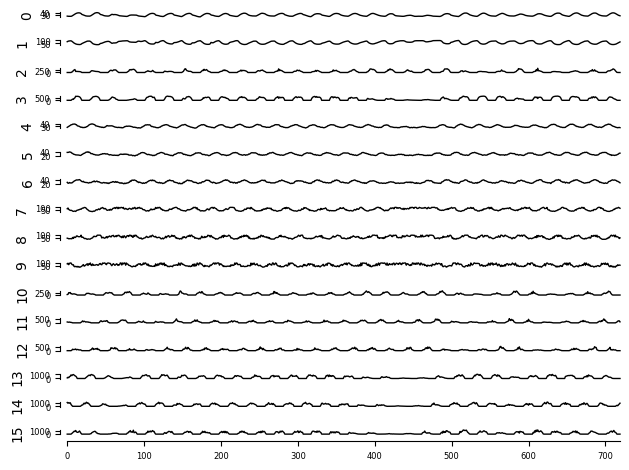

In [5]:
weather_data = pd.read_csv("citylearn_challenge_2023_phase_1/weather.csv")
print(weather_data)

weather_frame = pp.DataFrame(data=weather_data.values)
tp.plot_timeseries(weather_frame); plt.show()

In [6]:
dataset = pd.concat([electricity_data, carbon_data, pricing_data, weather_data], axis=1)
print(dataset)

     month  hour  day_type  daylight_savings_status  \
0        6     1         5                        0   
1        6     2         5                        0   
2        6     3         5                        0   
3        6     4         5                        0   
4        6     5         5                        0   
..     ...   ...       ...                      ...   
715      6    20         6                        0   
716      6    21         6                        0   
717      6    22         6                        0   
718      6    23         6                        0   
719      6    24         6                        0   

     indoor_dry_bulb_temperature  average_unmet_cooling_setpoint_difference  \
0                      23.098652                                  -0.123570   
1                      22.234743                                   0.012520   
2                      22.223060                                   0.000838   
3                      

In [7]:
#create a numpy array with the value of my dataset, create the tigramite dataframe

data_array = dataset.values
dataframe = pp.DataFrame(data=data_array, var_names=list(dataset.columns))

In [8]:
#Choose the type of conditional indipendent test (CMIknn in this case)
cmi_knn = CMIknn(significance='fixed_thres', model_selection_folds=3)

#do PCMCI
pcmci_cmi_knn = PCMCI(dataframe=dataframe, cond_ind_test=cmi_knn, verbosity=1)

#define tau_max, pc_alpha and alpha_level than run pcmci
results_cmi = pcmci_cmi_knn.run_pcmci(tau_max=5, pc_alpha=0.05, alpha_level=0.01) 


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = cmi_knn
tau_min = 1
tau_max = 5
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable month has 0 link(s):

    Variable hour has 1 link(s):
        (hour -1): max_pval = 0.00000, |min_val| =  0.184

    Variable day_type has 1 link(s):
        (day_type -1): max_pval = 0.00000, |min_val| =  0.054

    Variable daylight_savings_status has 0 link(s):

    Variable indoor_dry_bulb_temperature has 1 link(s):
        (indoor_dry_bulb_temperature -1): max_pval = 0.00000, |min_val| =  0.145

    Variable average_unmet_cooling_setpoint_difference has 1 link(s):
        (average_unmet_cooling_setpoint_difference -1): max_pval = 0.00000, |min_val| =  0.151

    Variable indoor_relative_humidity has 1 link(s):
        (indoor_relative_humidity -1): max_pval = 0.00000, |min_val| =  0.197

    Variable non_shiftable_load has 2 link(s):
    

In [9]:
#Show the results
print("p-values:")
print(results_cmi['p_matrix'])
print("Valori causali:")
print(results_cmi['val_matrix'])

p-values:
[[[ 1. nan nan nan nan nan]
  [nan nan nan nan nan nan]
  [nan nan nan nan nan nan]
  ...
  [nan nan nan nan nan nan]
  [nan nan nan nan nan nan]
  [nan nan nan nan nan nan]]

 [[nan nan nan nan nan nan]
  [ 1.  0.  0.  0.  0.  0.]
  [ 1.  1.  1.  1.  1.  1.]
  ...
  [ 0.  0.  0.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.]]

 [[nan nan nan nan nan nan]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1.  0.  0.  0.  0.  0.]
  ...
  [ 1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.]]

 ...

 [[nan nan nan nan nan nan]
  [ 0.  1.  1.  1.  1.  1.]
  [ 1.  1.  1.  1.  1.  1.]
  ...
  [ 1.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]]

 [[nan nan nan nan nan nan]
  [ 1.  1.  1.  1.  1.  0.]
  [ 1.  1.  1.  1.  1.  1.]
  ...
  [ 1.  1.  1.  1.  1.  0.]
  [ 1.  0.  0.  1.  1.  1.]
  [ 0.  0.  0.  1.  1.  1.]]

 [[nan nan nan nan nan nan]
  [ 1.  1.  1.  1.  1.  0.]
  [ 1.  1.  1.  1.  1.  1.]
  ...
  [ 0.  1.  1.

In [10]:
p_matrix = results_cmi['p_matrix']
val_matrix = results_cmi['val_matrix']

num_vars = len(dataframe.var_names)
for i in range(num_vars):
    for j in range(num_vars):
        for tau in range(p_matrix.shape[2]):
            if p_matrix[i, j, tau] < 0.05:
                print(f"Link significativo da {dataframe.var_names[i]} a {dataframe.var_names[j]} al lag {tau} "
                      f"con p-value {p_matrix[i, j, tau]:.4f} e MCI {val_matrix[i, j, tau]:.4f}")

Link significativo da hour a hour al lag 1 con p-value 0.0000 e MCI 0.0811
Link significativo da hour a hour al lag 2 con p-value 0.0000 e MCI 0.0135
Link significativo da hour a hour al lag 3 con p-value 0.0000 e MCI 0.0145
Link significativo da hour a hour al lag 4 con p-value 0.0000 e MCI 0.0134
Link significativo da hour a hour al lag 5 con p-value 0.0000 e MCI 0.0116
Link significativo da hour a indoor_dry_bulb_temperature al lag 0 con p-value 0.0000 e MCI 0.0153
Link significativo da hour a electricity_pricing_predicted_6h al lag 1 con p-value 0.0000 e MCI 0.0158
Link significativo da hour a outdoor_dry_bulb_temperature_predicted_6h al lag 1 con p-value 0.0000 e MCI 0.0158
Link significativo da hour a outdoor_dry_bulb_temperature_predicted_6h al lag 2 con p-value 0.0000 e MCI 0.0104
Link significativo da hour a outdoor_relative_humidity_predicted_6h al lag 2 con p-value 0.0000 e MCI 0.0105
Link significativo da hour a diffuse_solar_irradiance_predicted_6h al lag 0 con p-value 0.0

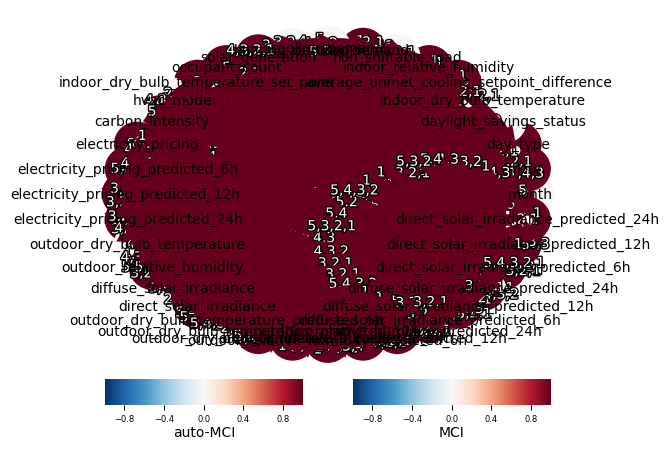

In [11]:
#mostro il plot del grafo delle time_series
tp.plot_graph(
    val_matrix=results_cmi['val_matrix'] < 0.05,
    graph=results_cmi['graph'],
    var_names=list(dataset.columns),
    link_colorbar_label='MCI',
    ); plt.show()

In [12]:
#length of time
T = data_array.shape[0]

#do the Prediction using CMIknn as conditional indipendent test
pred = Prediction(dataframe=dataframe,
                  cond_ind_test=cmi_knn, #ho usato sia la variabile creata sopra che CMIKNN()
                  prediction_model = sklearn.linear_model.LinearRegression(),
                  data_transform=sklearn.preprocessing.StandardScaler(),
                  train_indices= range(int(0.7*T)),
                  test_indices= range(int(0.2*T), T),
                  verbosity=1
                  )

Ora seguono diverse predizioni nel seguente ordine:

    1. Cooling_demand/Cooling load (target = 9)
    2. DHW demand/DHW load (target = 8)
    3. non-shiftable-load (target = 7)

Predizione del cooling load


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = cmi_knn
tau_min = 2
tau_max = 5
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable month has 0 link(s):

    Variable hour has 1 link(s):
        (hour -2): max_pval = 0.00000, |min_val| =  0.110

    Variable day_type has 1 link(s):
        (day_type -2): max_pval = 0.00000, |min_val| =  0.055

    Variable daylight_savings_status has 0 link(s):

    Variable indoor_dry_bulb_temperature has 0 link(s):

    Variable average_unmet_cooling_setpoint_difference has 0 link(s):

    Variable indoor_relative_humidity has 1 link(s):
        (indoor_relative_humidity -2): max_pval = 0.00000, |min_val| =  0.128

    Variable non_shiftable_load has 1 link(s):
        (outdoor_dry_bulb_temperature_predicted_6h -5): max_pval = 0.00000, |min_val| =  0.050

    Variable dhw_demand has 0 link(s):

    Variable cooling_demand has 1 link(s):
 

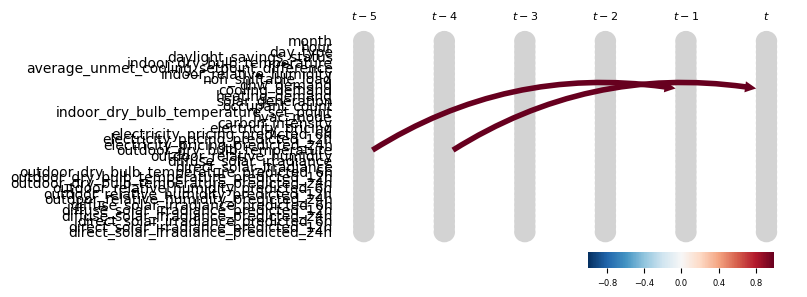

In [13]:
#il problema di sopra è che se uso CMIKNN e usando il debug sembra che rimanga in loop durante get_predictors per via dei neighboor in teoria.
#Invece se uso la variabile dà risultato come si può vedere sotto ma credo siano sbagliati perché se inserisco come target per esempio 8
#non risulta esserci nessun link anche se dall'output di get_predictors vediamo che qualche variabile ha dei link oppure se metto 9 gli unici
#link significativi che va a mostrare nel grafico sono solo della variabile target e un motivo credo sia per certi valori di p_value = NaN

#choose the variable target, tau_max and find the predictors
target = 9
tau_max = 5
predictors = pred.get_predictors(
                  selected_targets=[target],
                  steps_ahead=2,
                  tau_max=tau_max,
                  pc_alpha=0.05
                  )

#create the graph
graph = np.zeros((len(dataset.columns), len(dataset.columns), tau_max+1), dtype='bool')
for j in [target]:
    for p in predictors[j]:
        graph[p[0], j, abs(p[1])] = 1

# Plot time series graph
tp.plot_time_series_graph(
    figsize=(6, 3),
    val_matrix=np.ones(graph.shape),
    graph=graph,
    var_names=list(dataset.columns),
    link_colorbar_label='',
    ); plt.show()

In [14]:
#Fit the predictive model using the specified predictors and target

pred.fit(target_predictors=predictors, 
                selected_targets=[target],
                    tau_max=tau_max)

c:\Users\Simone\Desktop\Tesi\tigramite\models.py:1894: UserWarning: test_indices - maxlag(predictors) [or tau_max] overlaps with train_indices: Choose test_indices such that there is a gap of max_lag to train_indices!
  warnings.warn("test_indices - maxlag(predictors) [or tau_max] "


In [15]:
#definition of the NRMSE

def NRMSE(real, pred):
    return sqrt(mean_squared_error(real, pred)/(real.max() - real.min()))

In [16]:
# Funzione per calcolare NRMSE per una singola variabile con finestra temporale
#per facilitarmi ho cercato di calcolare lo ScoreForecast come se avessi una sola variabile
#poi come si vede in fondo al file faccio una classica media sugli nrmse calcolati in questo modo

def NRMSE_window_single_variable(real, pred, w):
    num_timesteps = len(real)  # Total number of time steps, quindi quello che è indicato con n
    nrmse_windows = []  # Lista per raccogliere gli NRMSE di ciascuna finestra, quindi dalla formula la sommatoria sotto radice
    
    # Itero su ogni finestra temporale
    for t in range(num_timesteps - w + 1):
        #qui cerco di trovare quello che in teoria definisce ft,τv: Forecast of variable v for time step t+τ, made at time t;
        
        real_window = real[t:t+w]
        pred_window = pred[t:t+w]
        
        # Calcolo l'NRMSE tra i valori reali e predetti della finestra e lo aggiungo alla lista
        nrmse_windows.append(NRMSE(real_window, pred_window))
    
    # Restituisco infine la media degli NRMSE per tutte le finestre temporali
    return np.mean(nrmse_windows)


##
## Predicting target 9
##


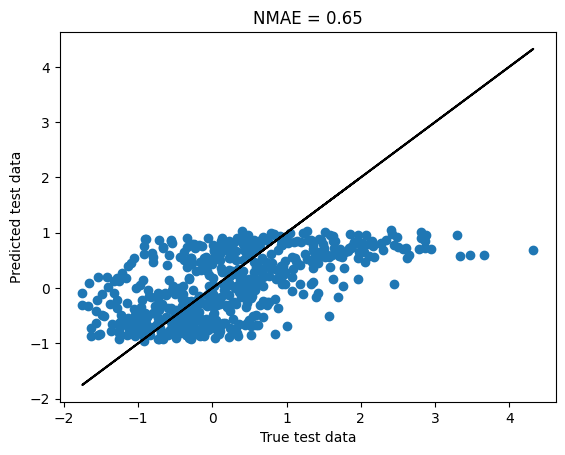

In [17]:
predicted = pred.predict(target)
true_data = pred.get_test_array(j=target)[0]

plt.scatter(true_data, predicted)
plt.title(r"NMAE = %.2f" % (np.abs(true_data - predicted).mean()/true_data.std()))
plt.plot(true_data, true_data, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()

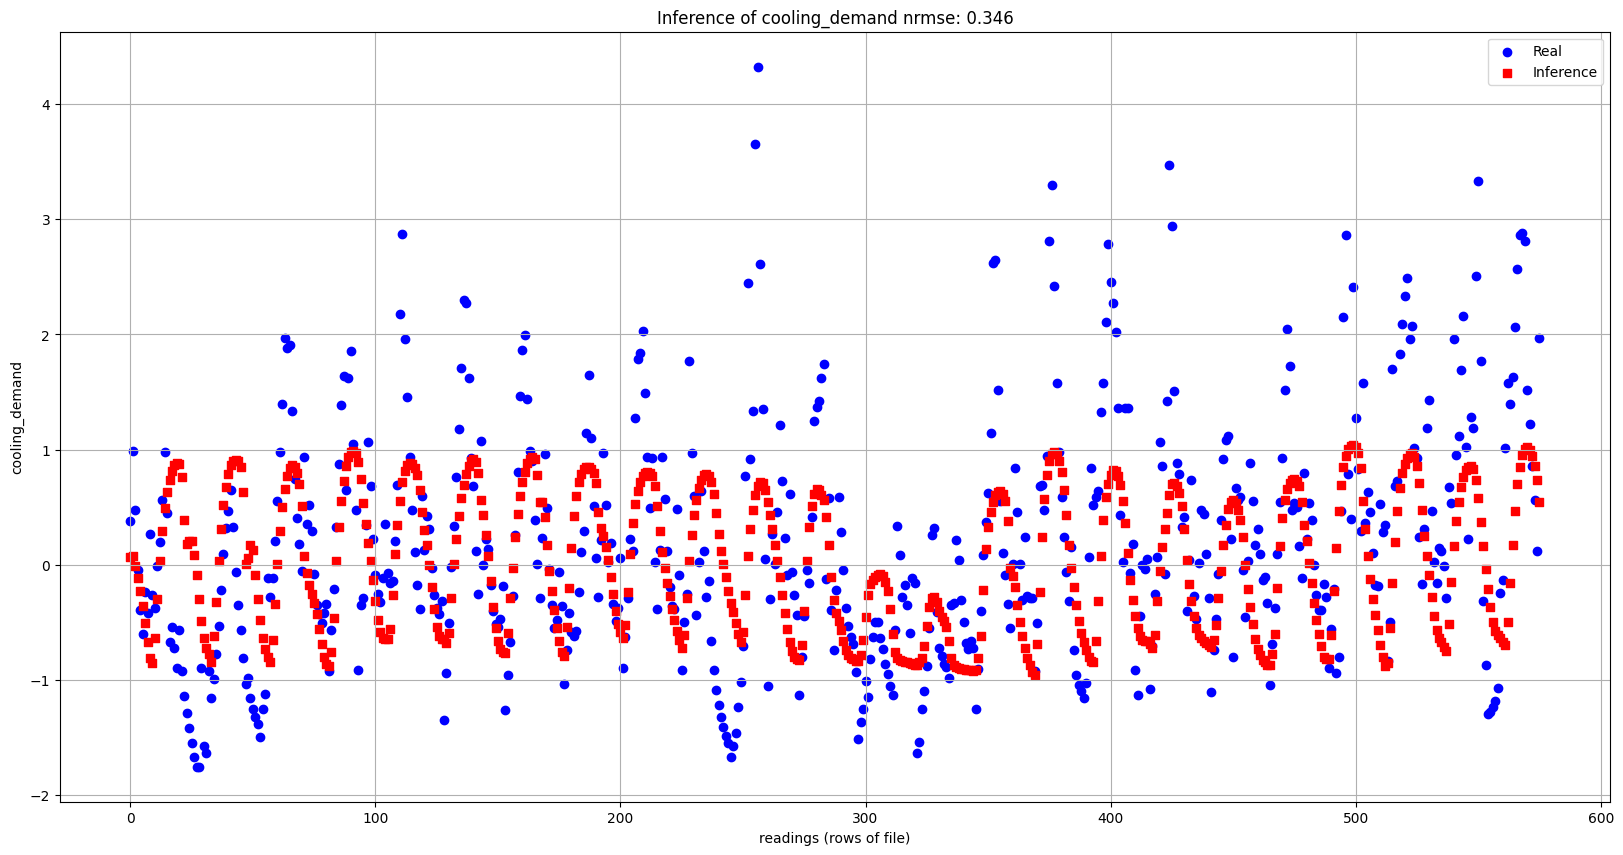

In [18]:
my_x=np.arange(0,len(true_data[:]),1)
nrmse_cooling = NRMSE(true_data, predicted)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, true_data, label='Real', color='blue', marker='o')
plt.scatter(my_x, predicted, label='Inference', color='red', marker='s')
plt.title(f'Inference of cooling_demand nrmse: {nrmse_cooling:.3f}')
plt.ylabel('cooling_demand')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

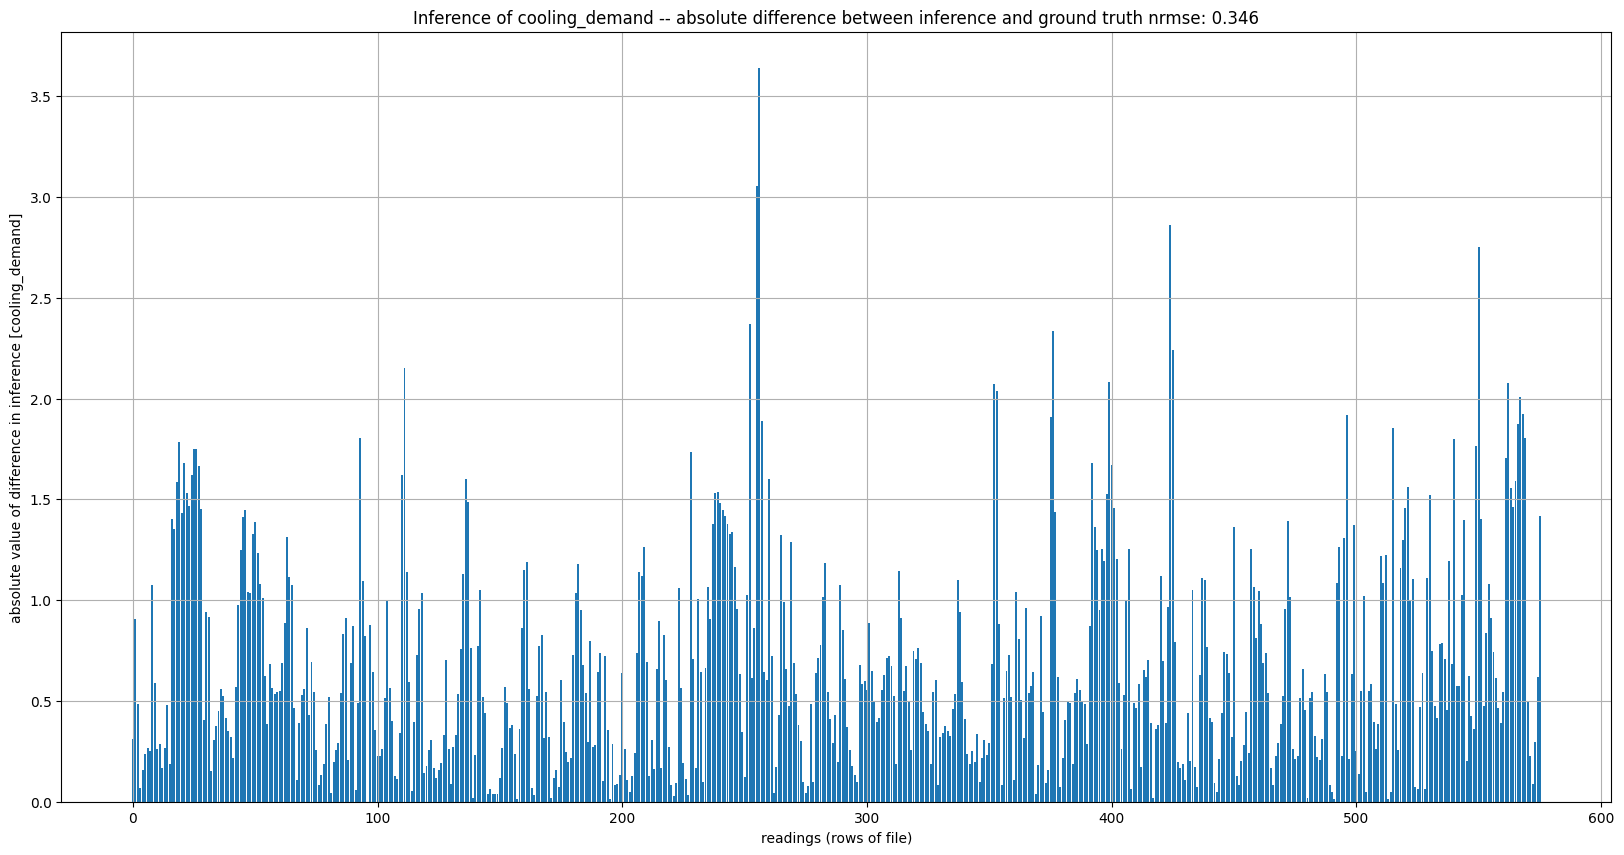

In [19]:
fig = plt.figure(figsize=(20,10))
my_d = abs(true_data-predicted)

plt.bar(my_x,my_d)
plt.title(f'Inference of cooling_demand -- absolute difference between inference and ground truth nrmse: {nrmse_cooling:.3f}')
plt.ylabel('absolute value of difference in inference [cooling_demand]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()

In [20]:
w = 48

nrmse_single_cooling = NRMSE_window_single_variable(true_data, predicted, w)
print("NRMSE per singola variabile con finestra temporale:", nrmse_single_cooling)

NRMSE per singola variabile con finestra temporale: 0.4054580701006175


Predizione del dhw load


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = cmi_knn
tau_min = 1
tau_max = 5
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable month has 0 link(s):

    Variable hour has 1 link(s):
        (hour -1): max_pval = 0.00000, |min_val| =  0.186

    Variable day_type has 1 link(s):
        (day_type -1): max_pval = 0.00000, |min_val| =  0.072

    Variable daylight_savings_status has 0 link(s):

    Variable indoor_dry_bulb_temperature has 1 link(s):
        (indoor_dry_bulb_temperature -1): max_pval = 0.00000, |min_val| =  0.107

    Variable average_unmet_cooling_setpoint_difference has 1 link(s):
        (average_unmet_cooling_setpoint_difference -1): max_pval = 0.00000, |min_val| =  0.163

    Variable indoor_relative_humidity has 1 link(s):
        (indoor_relative_humidity -1): max_pval = 0.00000, |min_val| =  0.200

    Variable non_shiftable_load has 2 link(s):
    

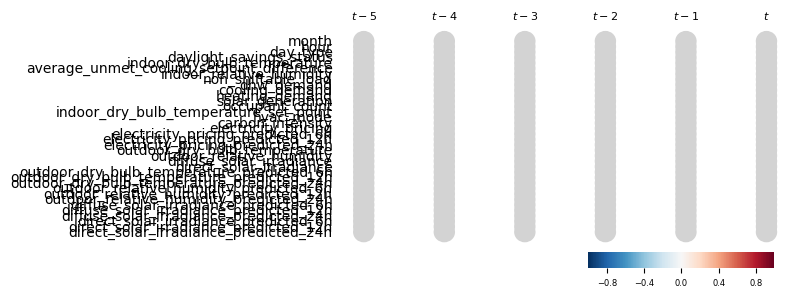

In [21]:
#choose the variable target, tau_max and find the predictors
target = 8
#tau_max = 5
predictors = pred.get_predictors(
                  selected_targets=[target],
                  steps_ahead=1,
                  tau_max=tau_max,
                  pc_alpha=0.05
                  )

#create the graph
graph = np.zeros((len(dataset.columns), len(dataset.columns), tau_max+1), dtype='bool')
for j in [target]:
    for p in predictors[j]:
        graph[p[0], j, abs(p[1])] = 1

# Plot time series graph
tp.plot_time_series_graph(
    figsize=(6, 3),
    val_matrix=np.ones(graph.shape),
    graph=graph,
    var_names=list(dataset.columns),
    link_colorbar_label='',
    ); plt.show()

In [22]:
#Fit the predictive model using the specified predictors and target

pred.fit(target_predictors=predictors, 
                selected_targets=[target],
                    tau_max=tau_max)

c:\Users\Simone\Desktop\Tesi\tigramite\models.py:1894: UserWarning: test_indices - maxlag(predictors) [or tau_max] overlaps with train_indices: Choose test_indices such that there is a gap of max_lag to train_indices!
  warnings.warn("test_indices - maxlag(predictors) [or tau_max] "



##
## Predicting target 8
##


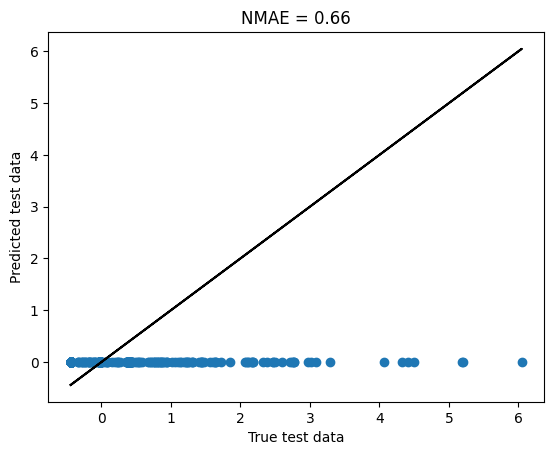

In [23]:
predicted = pred.predict(target)
true_data = pred.get_test_array(j=target)[0]

plt.scatter(true_data, predicted)
plt.title(r"NMAE = %.2f" % (np.abs(true_data - predicted).mean()/true_data.std()))
plt.plot(true_data, true_data, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()

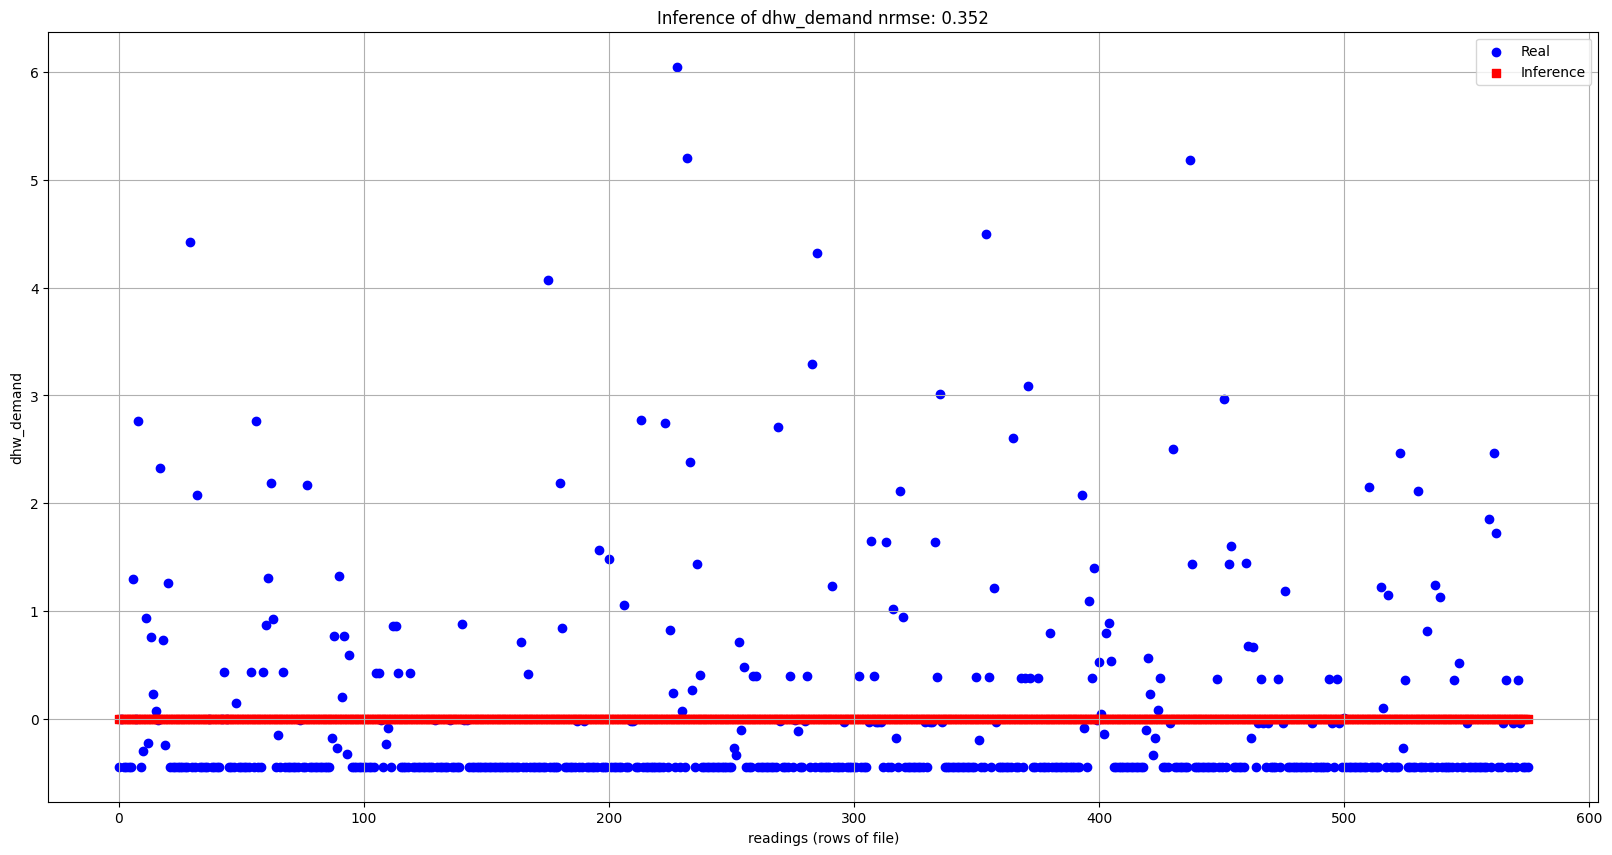

In [24]:
my_x=np.arange(0,len(true_data[:]),1)
nrmse_dhw = NRMSE(true_data, predicted)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, true_data, label='Real', color='blue', marker='o')
plt.scatter(my_x, predicted, label='Inference', color='red', marker='s')
plt.title(f'Inference of dhw_demand nrmse: {nrmse_dhw:.3f}')
plt.ylabel('dhw_demand')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

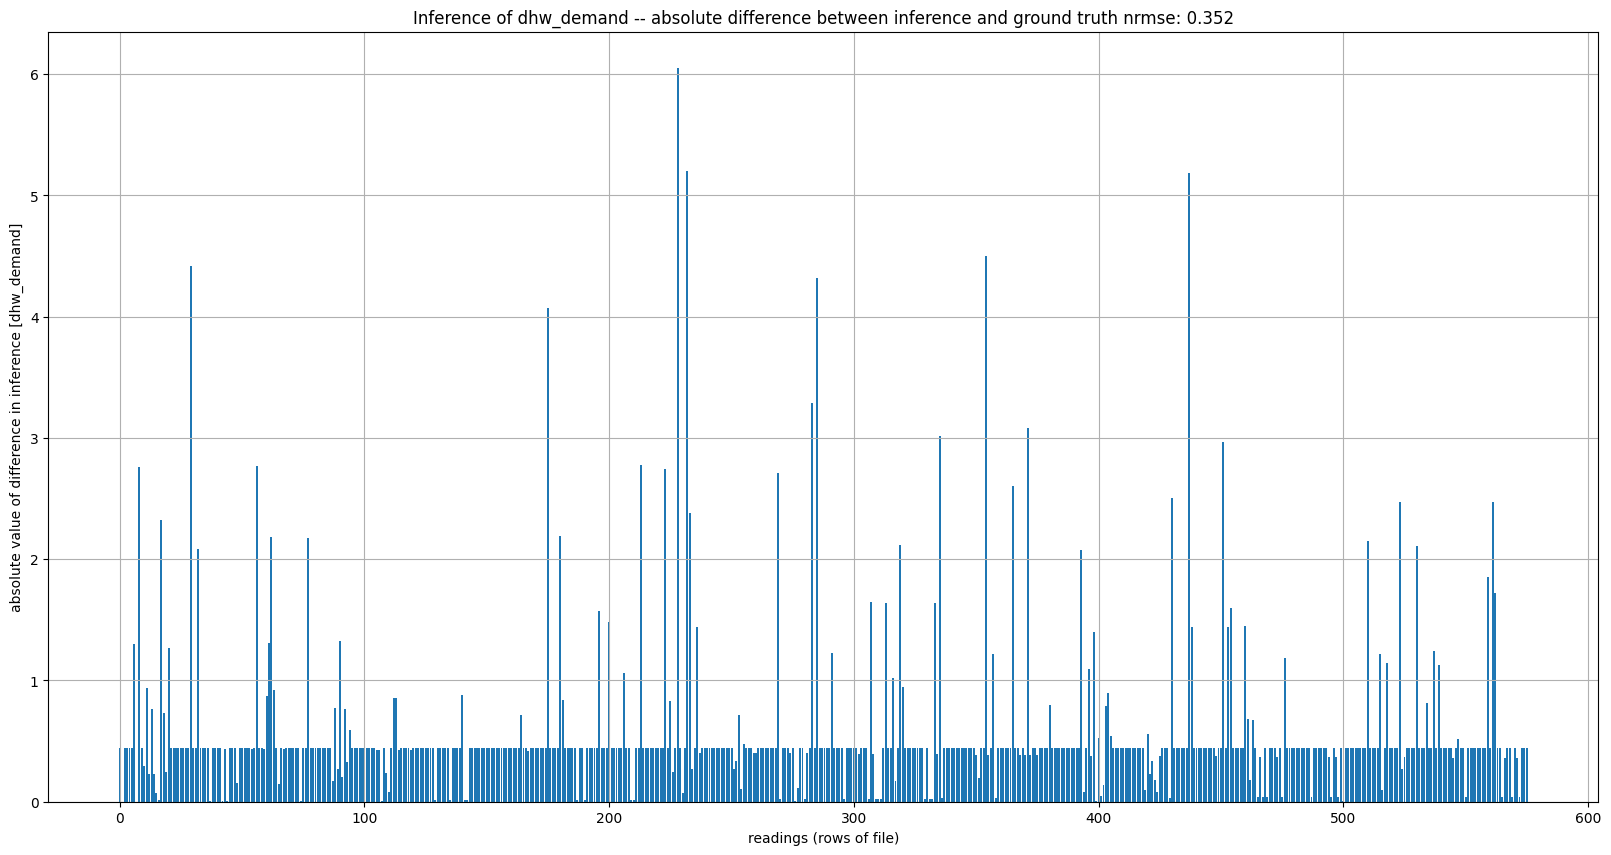

In [25]:
fig = plt.figure(figsize=(20,10))
my_d = abs(true_data-predicted)

plt.bar(my_x,my_d)
plt.title(f'Inference of dhw_demand -- absolute difference between inference and ground truth nrmse: {NRMSE(true_data, predicted):.3f}')
plt.ylabel('absolute value of difference in inference [dhw_demand]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()

In [26]:
w = 48

nrmse_single_dhw = NRMSE_window_single_variable(true_data, predicted, w)
print("NRMSE per singola variabile con finestra temporale:", nrmse_single_dhw)

NRMSE per singola variabile con finestra temporale: 0.4330185468940644


Predizione del non_shiftable_load


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = cmi_knn
tau_min = 1
tau_max = 5
pc_alpha = [0.05]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable month has 0 link(s):

    Variable hour has 1 link(s):
        (hour -1): max_pval = 0.00000, |min_val| =  0.186

    Variable day_type has 1 link(s):
        (day_type -1): max_pval = 0.00000, |min_val| =  0.072

    Variable daylight_savings_status has 0 link(s):

    Variable indoor_dry_bulb_temperature has 1 link(s):
        (indoor_dry_bulb_temperature -1): max_pval = 0.00000, |min_val| =  0.107

    Variable average_unmet_cooling_setpoint_difference has 1 link(s):
        (average_unmet_cooling_setpoint_difference -1): max_pval = 0.00000, |min_val| =  0.163

    Variable indoor_relative_humidity has 1 link(s):
        (indoor_relative_humidity -1): max_pval = 0.00000, |min_val| =  0.200

    Variable non_shiftable_load has 2 link(s):
    

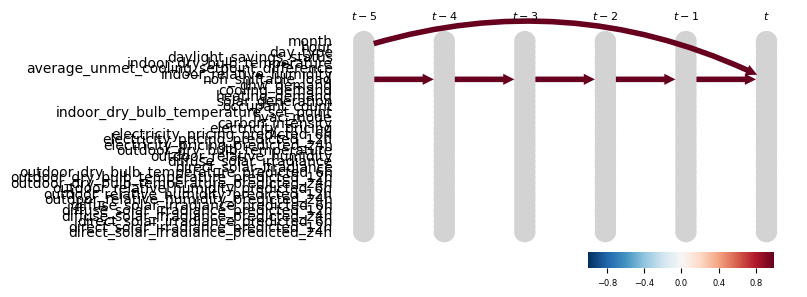

In [27]:
#choose the variable target, tau_max and find the predictors
target = 7
#tau_max = 5
predictors = pred.get_predictors(
                  selected_targets=[target],
                  steps_ahead=1,
                  tau_max=tau_max,
                  pc_alpha=0.05
                  )

#create the graph
graph = np.zeros((len(dataset.columns), len(dataset.columns), tau_max+1), dtype='bool')
for j in [target]:
    for p in predictors[j]:
        graph[p[0], j, abs(p[1])] = 1

# Plot time series graph
tp.plot_time_series_graph(
    figsize=(6, 3),
    val_matrix=np.ones(graph.shape),
    graph=graph,
    var_names=list(dataset.columns),
    link_colorbar_label='',
    ); plt.show()

In [28]:
#Fit the predictive model using the specified predictors and target

pred.fit(target_predictors=predictors, 
                selected_targets=[target],
                    tau_max=tau_max)

c:\Users\Simone\Desktop\Tesi\tigramite\models.py:1894: UserWarning: test_indices - maxlag(predictors) [or tau_max] overlaps with train_indices: Choose test_indices such that there is a gap of max_lag to train_indices!
  warnings.warn("test_indices - maxlag(predictors) [or tau_max] "



##
## Predicting target 7
##


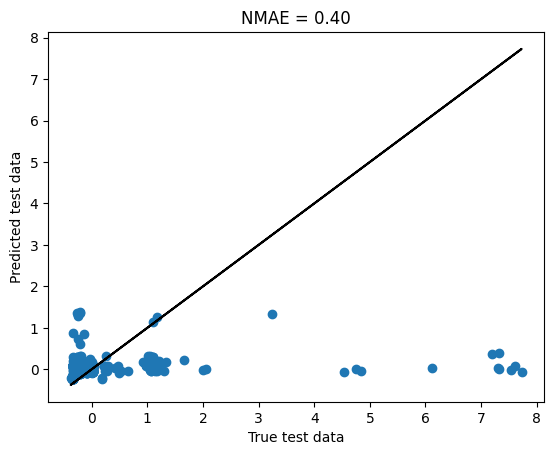

In [29]:
predicted = pred.predict(target)
true_data = pred.get_test_array(j=target)[0]

plt.scatter(true_data, predicted)
plt.title(r"NMAE = %.2f" % (np.abs(true_data - predicted).mean()/true_data.std()))
plt.plot(true_data, true_data, 'k-')
plt.xlabel('True test data')
plt.ylabel('Predicted test data')
plt.show()

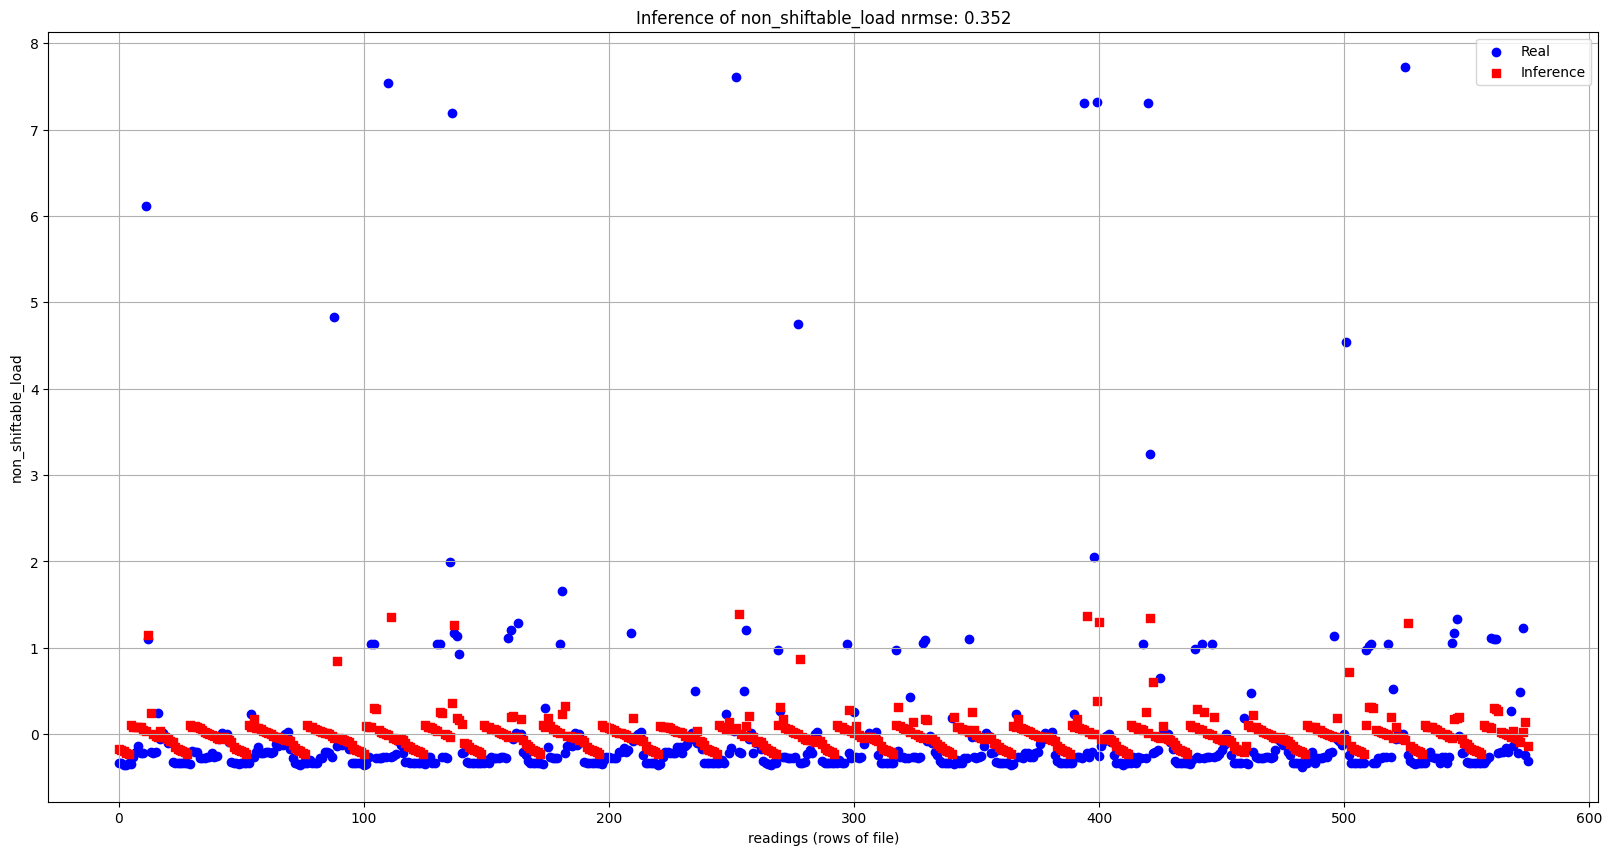

In [30]:
my_x=np.arange(0,len(true_data[:]),1)
nrmse_nonshiftable = NRMSE(true_data, predicted)

fig = plt.figure(figsize=(20,10))
plt.scatter(my_x, true_data, label='Real', color='blue', marker='o')
plt.scatter(my_x, predicted, label='Inference', color='red', marker='s')
plt.title(f'Inference of non_shiftable_load nrmse: {nrmse_nonshiftable:.3f}')
plt.ylabel('non_shiftable_load')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.legend()
plt.show()

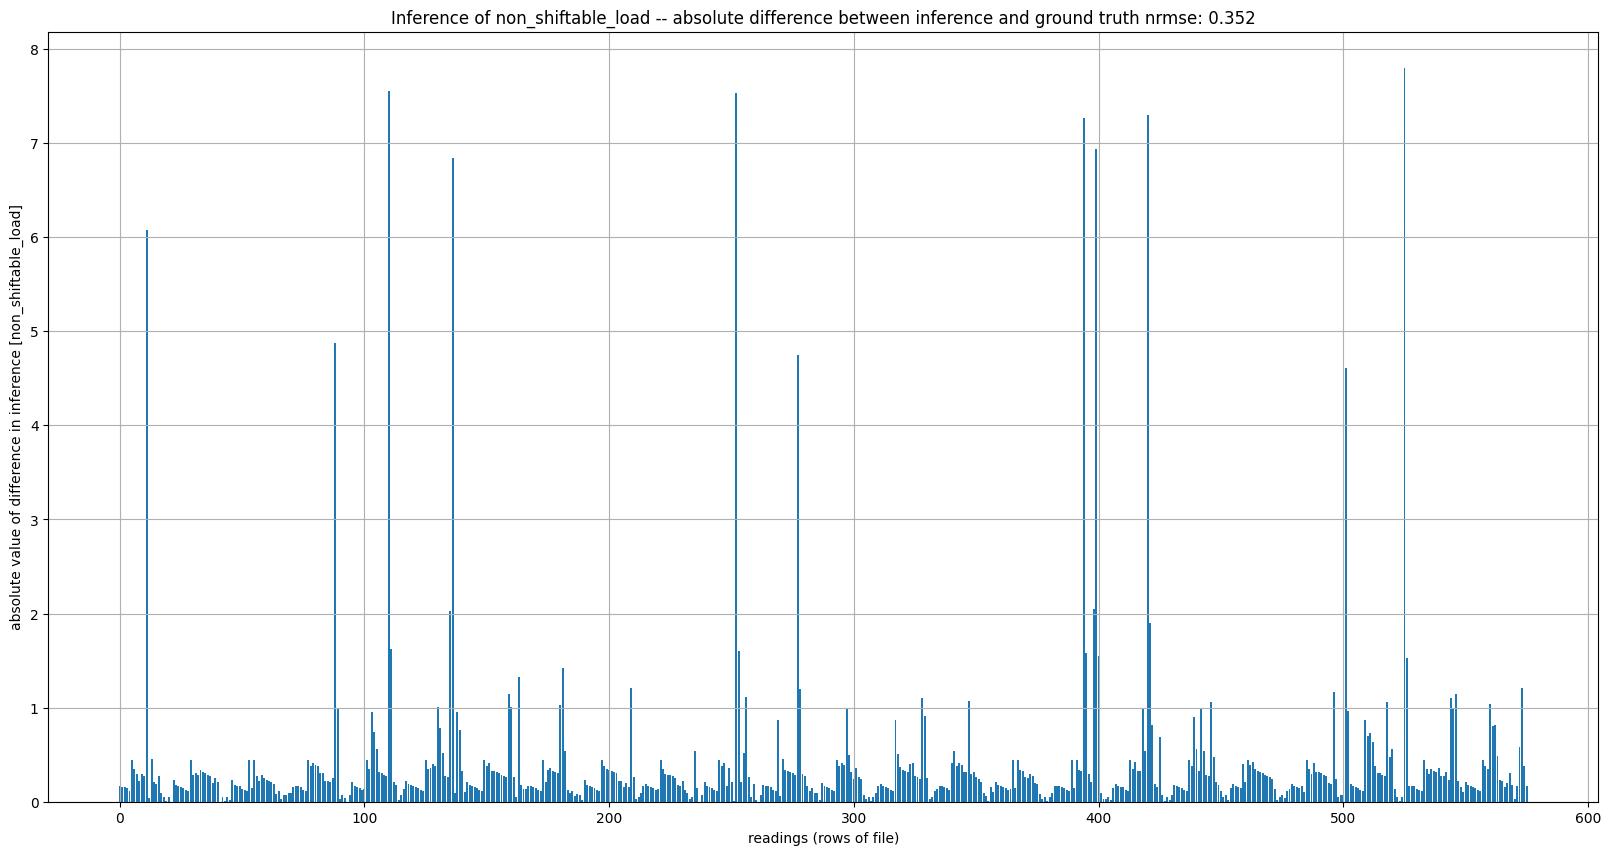

In [31]:
fig = plt.figure(figsize=(20,10))
my_d = abs(true_data-predicted)

plt.bar(my_x,my_d)
plt.title(f'Inference of non_shiftable_load -- absolute difference between inference and ground truth nrmse: {NRMSE(true_data, predicted):.3f}')
plt.ylabel('absolute value of difference in inference [non_shiftable_load]')
plt.xlabel('readings (rows of file)')
plt.grid()
plt.show()

In [32]:
w = 48

nrmse_single_non_shiftable = NRMSE_window_single_variable(true_data, predicted, w)
print("NRMSE per singola variabile con finestra temporale:", nrmse_single_non_shiftable)

NRMSE per singola variabile con finestra temporale: 0.388127692555388


In [33]:
ScoreForecast = (nrmse_nonshiftable + nrmse_cooling + nrmse_dhw) / 3
print(f"La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: {ScoreForecast:.3f}.")

La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: 0.350.


In [34]:
ScoreForecast = (nrmse_single_non_shiftable + nrmse_single_cooling + nrmse_single_dhw) / 3
print(f"La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: {ScoreForecast:.3f}.")

La media, su tutte le variabili previste, dell'errore quadratico medio normalizzato (NRMSE) delle previsioni effettuate: 0.409.
